# Exercise 6

Rebecca Ghidoni

ID:2026709
***

## Exercise 1

### A)
The probability distribution of the number of times the new method fails to detect the disease is a BINOMIAL DISTRIBUTION. 

### B)
The frequentist estimator is 6/75 = #failure/#total patients

### C)

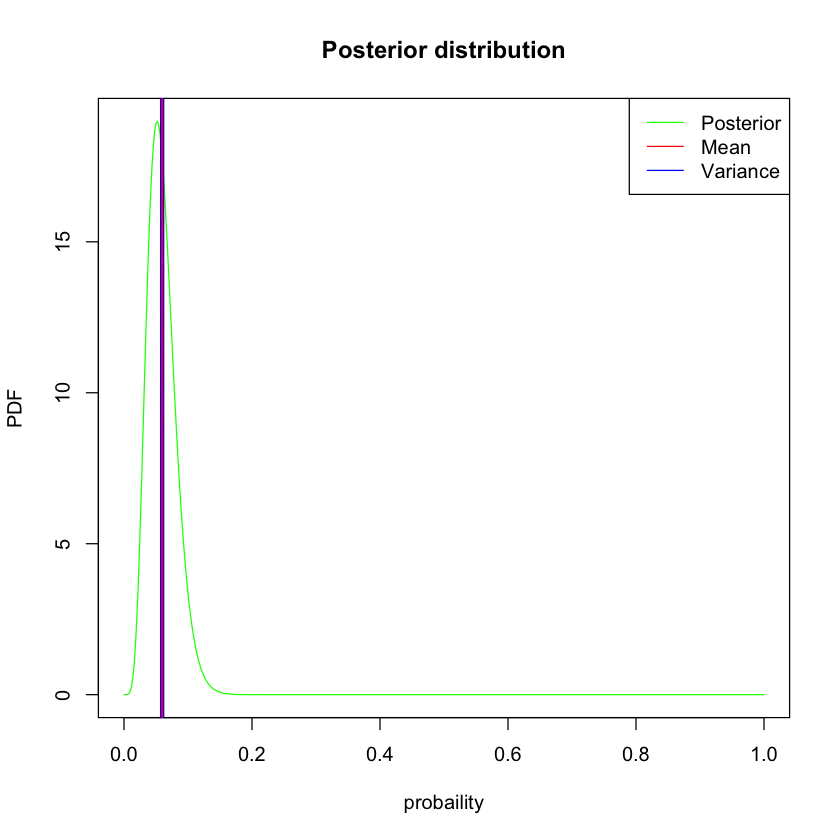

In [1]:
mu <- 0.15
sigma <-0.14
fail <- 6
tot <-75

alfa <- ((1-mu)*mu/sigma^2-1)*mu + fail
beta <- alfa*(1/mu - 1) + tot-fail

posterior = function(x) dbeta(x,alfa, beta)

mean =  (alfa)/(alfa + beta)
variance = (alfa)*(beta)/(((alfa+ beta)^2)*(alfa + beta+1))
plot(seq(0,1,0.002),posterior(seq(0,1,0.002)), t = "l", main = "Posterior distribution", 
     xlab = "probaility", ylab = "PDF",col='green')
abline (v=mean-variance,col='blue',lwd=3)
abline (v=mean+variance,col='blue',lwd=3)
abline (v=mean,col='red',lwd=1.5)


legend('topright',legend=c("Posterior", "Mean", "Variance"),
       col=c("green", "red", "blue") ,lty=1)


### D)

In [2]:
cat("For the bayesian approach the integral for probability > 0.15 is " , 
    pbeta(0.15,alfa, beta, lower.tail = FALSE)*100,"%")


For the bayesian approach the integral for probability > 0.15 is  0.08827121 %

So it's possible to reject the null hypothesis with a significance level of 5%

### E)

In [3]:
cat("For the frequentist approach the integral for probability > 0.15 is ",pbinom(6,75,0.15)*100,"%")

For the frequentist approach the integral for probability > 0.15 is  5.43533 %

So we cannot reject the null hypothesis with a significance level of 5%

## Exercise 2

### A)

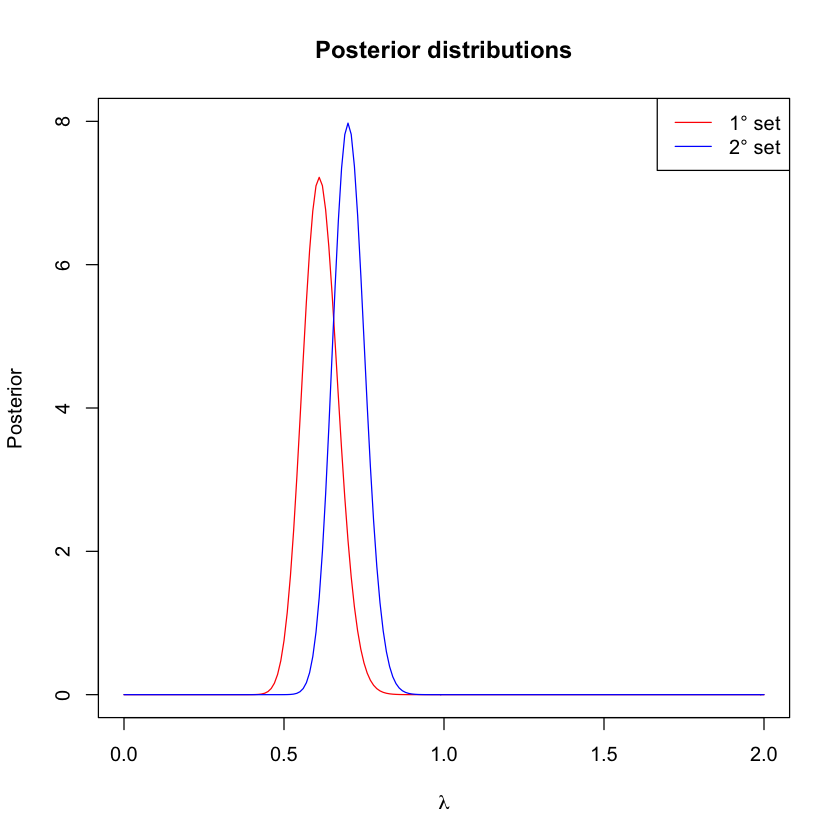

In [4]:
P1 = function(x){dgamma(x,123,200)}
P2 = function(x){dgamma(x,197,280)}
plot(seq(0,2,0.01), P1(seq(0,2,0.01)),
     t = "l", main = "Posterior distributions",
     xlab = expression(lambda), ylim = c(0,8), ylab='Posterior',
     col = 'red')
lines(seq(0,2,0.01), P2(seq(0,2,0.01)), col = 'blue')

legend('topright',legend=c("1° set", "2° set"),
       col=c("red", "blue"),lty=1)

In [5]:
cl <- function (P,cl) {
    down = uniroot(function(x){integrate(P,0,x)[[1]] - cl/2}, lower = 0, upper = 1)$root
    up = uniroot(function(x){integrate(P,x,1)[[1]] - cl/2}, lower = 0, upper = 1)$root
    return(c(down,',',up))}

In [6]:
cat('For the first set:\n')
cat("    The posterior mean ", 123/200,'\n')
cat("    The posterior median is ", uniroot(function(y){integrate(P1,0,y)[[1]] - 0.5}, lower = 0, upper = 10)$root,'\n')
cat("    The posterior variance is ",123/200^2,'\n')
cat("    The 95% credibility interval is ["
        ,cl(P1,0.05),']\n\n')


cat('For the second set:\n')
cat("    The posterior mean is ", 197/280,'\n')
cat("    The posterior median is ", uniroot(function(y){integrate(P2,0,y)[[1]] - 0.5}, lower = 0, upper = 10)$root,'\n')
cat("    The posterior variance is ",197/280^2,'\n')
cat("    The 95% credibility interval is ["
        ,cl(P2,0.05),']')


For the first set:
    The posterior mean  0.615 
    The posterior median is  0.6133215 
    The posterior variance is  0.003075 
    The 95% credibility interval is [ 0.511098059009597 , 0.728340714822995 ]

For the second set:
    The posterior mean is  0.7035714 
    The posterior median is  0.702382 
    The posterior variance is  0.002512755 
    The 95% credibility interval is [ 0.608752649922022 , 0.805156273721794 ]

### B)

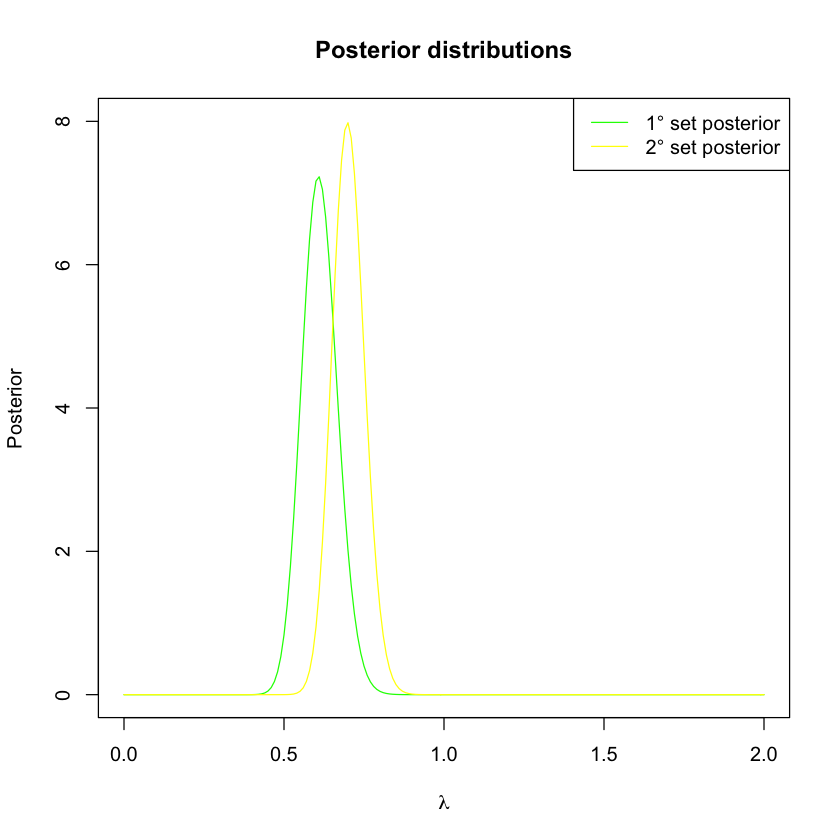

In [7]:
P3 = function(x){dgamma(x,122.5,200)}
P4 = function(x){dgamma(x,196.5,280)}

plot(seq(0,2,0.01), P3(seq(0,2,0.01)),
     t = "l", main = "Posterior distributions",
     xlab = expression(lambda), ylab = "Posterior", ylim = c(0,8),
     col = 'green')

lines(seq(0,2,0.01), P4(seq(0,2,0.01)),
      lty = 1, col = 'yellow')

legend('topright',legend=c("1° set posterior", "2° set posterior"),
       col=c("green", "yellow"), lty=1 )

In [8]:
cat('For the first set:\n')
cat("    The posterior mean is ", 122.5/200,'\n')
cat("    The posterior median is ", uniroot(function(y){integrate(P3,0,y)[[1]] - 0.5}, lower = 0, upper = 10)$root,'\n')
cat("    The posterior variance is ",122.5/200^2,'\n')
cat("    The 95% credibility interval is [",cl(P3,0.05),']\n\n')

cat('For the second set:\n')
cat("    The posterior mean is ", 196.5/280,'\n')
cat("    The posterior median is ", uniroot(function(y){integrate(P4,0,y)[[1]] - 0.5}, lower = 0, upper = 10)$root,'\n')
cat("    The posterior variance is ",196.5/280^2,'\n')
cat("    The 95% credibility interval is [",cl(P3,0.05),']\n\n')

For the first set:
    The posterior mean is  0.6125 
    The posterior median is  0.6108342 
    The posterior variance is  0.0030625 
    The 95% credibility interval is [ 0.508863731555734 , 0.725593195108186 ]

For the second set:
    The posterior mean is  0.7017857 
    The posterior median is  0.7005961 
    The posterior variance is  0.002506378 
    The 95% credibility interval is [ 0.508863731555734 , 0.725593195108186 ]



## Exercise 3

### A)

In [9]:
cat('The frequentist estimator for p is', 11/116,' = #success/#total')


The frequentist estimator for p is 0.09482759  = #success/#total

### B)

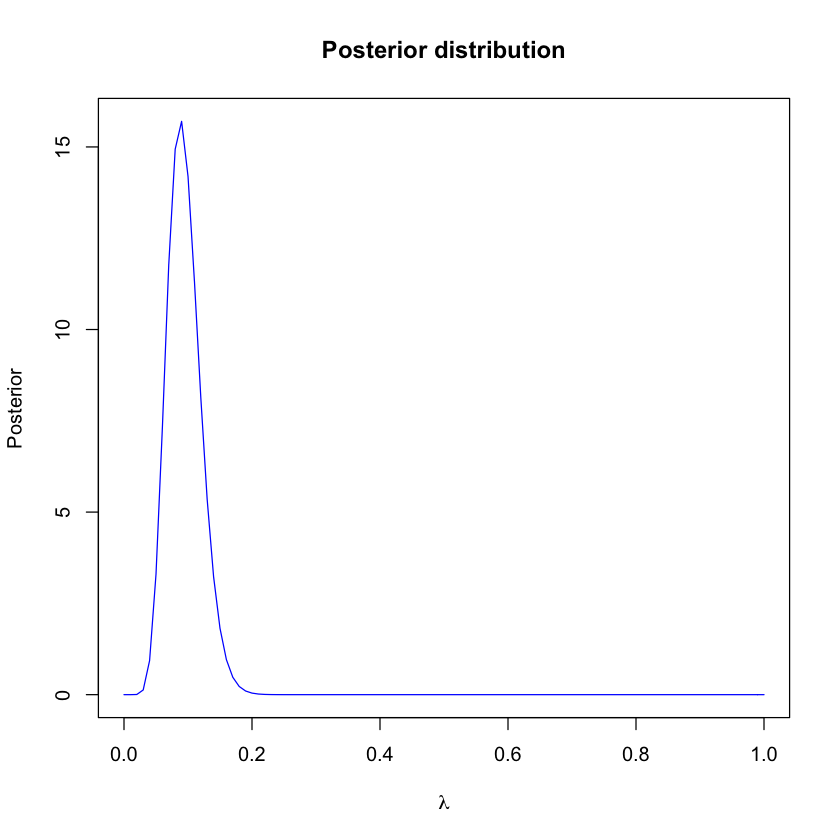

In [10]:
alpha = 12
beta = 115
post <- function(x){dbeta(x,alpha, beta )}

plot(seq(0,1,0.01), post(seq(0,1,0.01)),
     t = "l", main = "Posterior distribution",
     xlab = expression(lambda), ylab = "Posterior",
     col = 'blue')

### C)

In [11]:
cat("The posterior mean is ", alpha/(alpha + beta),'\n')
cat("The posterior variance is ", (alpha*beta)/((alpha + beta)^2*(alpha +beta +1)),'\n')
cat("The posterior 95% credibility interval for the posterior is [",cl(post,0.05),"]")

The posterior mean is  0.09448819 
The posterior variance is  0.0006684388 
The posterior 95% credibility interval for the posterior is [ 0.0501892120761295 , 0.15083292715532 ]

### D)
Since the p=0.1 is inside the credibility interval, is not possible to reject the null hypothesis.

In [12]:
cat("The interval between 0 and 10 has a total cumulative probability of ", 1-(pbinom(0,116,0.1)+ pbinom(10,116,0.1, lower.tail = FALSE)),
    'while between 12 and 116 we have a cumulative probability of', 1-(pbinom(12,116,0.1)+ pbinom(116,116,0.1, lower.tail = FALSE)),
    'so 11 surely must be included to reach the 95% confidence interval')

The interval between 0 and 10 has a total cumulative probability of  0.3810197 while between 12 and 116 we have a cumulative probability of 0.3758243 so 11 surely must be included to reach the 95% confidence interval

### E)

In [13]:
cat('The frequentist estimator for p is', 9/165,' = #success/#total')



The frequentist estimator for p is 0.05454545  = #success/#total

### F)

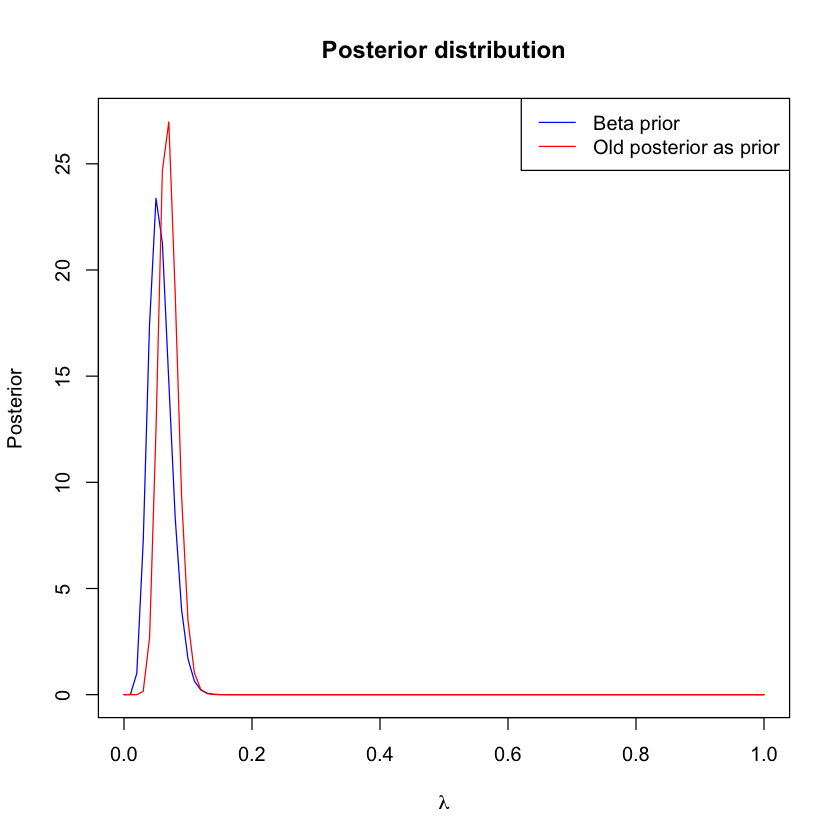

In [14]:
alpha = 10
beta = 165
post1 <- function(x){ dbeta(x,alpha, beta )}
post2<- function(x){ dbeta(x,alpha+11, beta+116 )}
plot(seq(0,1,0.01), post1(seq(0,1,0.01)),
     t = "l", main = "Posterior distribution",
     xlab = expression(lambda), ylab = "Posterior",
     col = 'blue',ylim=c(0,27))
lines(seq(0,1,0.01), post2(seq(0,1,0.01)),col = 'red')

legend('topright',legend=c("Beta prior", "Old posterior as prior"),
       col=c("blue", "red"), lty=1 )

### G)

In [15]:
cat("For beta prior:\n")
cat("    The posterior mean is ", alpha/(alpha + beta),'\n')
cat("    The posterior variance is ", (alpha*beta)/((alpha + beta)^2*(alpha +beta +1)),'\n')
cat("    The posterior 95% credibility interval for the posterior is [",cl(post1,0.05),"]\n")

cat("For previous posterior as prior:\n")
cat("    The posterior mean is ", (alpha+11)/(alpha+11 + beta+116),'\n')
cat("    The posterior variance is ", ((alpha+11)*(beta+116))/((alpha+11 + beta+116)^2*(alpha+11 +beta +116+1)),'\n')
cat("    The posterior 95% credibility interval for the posterior is [",cl(post2,0.05),"]")

For beta prior:
    The posterior mean is  0.05714286 
    The posterior variance is  0.0003061224 
    The posterior 95% credibility interval for the posterior is [ 0.0278971916494591 , 0.0959395696545488 ]
For previous posterior as prior:
    The posterior mean is  0.06953642 
    The posterior variance is  0.000213535 
    The posterior 95% credibility interval for the posterior is [ 0.0436799591423317 , 0.100757041649175 ]

### H) (For beta prior)
Since the p=0.1 is outside the credibility interval, it's possible to reject the null hypothesis.

In [16]:
cat("The interval between 0 and 10 has a total cumulative probability of ", 1-(pbinom(0,165,0.1)+ pbinom(8,165,0.1, lower.tail = FALSE)),
    'while between 12 and 116 we have a cumulative probability of', 1-(pbinom(10,165,0.1)+ pbinom(165,165,0.1, lower.tail = FALSE)),
    'so 9 surely must be included to reach the 95% confidence interval')

The interval between 0 and 10 has a total cumulative probability of  0.01290583 while between 12 and 116 we have a cumulative probability of 0.9473117 so 9 surely must be included to reach the 95% confidence interval

### H) (For previous posterior as prior)
Since the p=0.1 is inside the credibility interval, it's impossible to reject the null hypothesis.

In [17]:
cat("The interval between 0 and 19 has a total cumulative probability of ", 1-(pbinom(0,281,0.1)+ pbinom(19,281,0.1, lower.tail = FALSE)),
    'while between 21 and 281 we have a cumulative probability of', 1-(pbinom(21,281,0.1)+ pbinom(281,281,0.1, lower.tail = FALSE)),
    'so 9 (+11 from the prior) surely must be included to reach the 95% confidence interval')


The interval between 0 and 19 has a total cumulative probability of  0.03824614 while between 21 and 281 we have a cumulative probability of 0.9091088 so 9 (+11 from the prior) surely must be included to reach the 95% confidence interval